# Project Title: E-Commerce Customer Purchase Analysis

## **Objective:**
> ## To understand customer purchase behavior, preferences, and trends in an e-commerce setting, enabling better decision-making for targeted marketing and sales strategies.

# Loading Liabraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [86]:
df = pd.read_csv(r'/kaggle/input/ecommerce-dataset-for-data-analysis/project1_df.csv')
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


# Exploratory Data Analysis and Cleaning

In [87]:
df.shape

(55000, 13)

In [88]:
df.describe(include = 'object')

,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Purchase Method,Location
count,55000,55000,55000,55000,55000,27415,55000,55000
unique,3,5,54988,9,2,5,8,14
top,Female,25-45,04/07/2022 11:45:29,Electronics,No,NEWYEARS,Credit Card,Mumbai
freq,18454,22010,2,16574,27585,8135,22096,11197


In [89]:
for col in df.describe(include = 'object'):
    print(col)
    print(df[col].unique())
    print('-'*50)

Gender
['Female' 'Male' 'Other']
--------------------------------------------------
Age Group
['25-45' '60 and above' '18-25' '45-60' 'under 18']
--------------------------------------------------
Purchase Date
['30/08/2023 20:27:08' '23/02/2024 09:33:46' '06/03/2022 09:09:50' ...
 '02/08/2024 09:30:44' '05/08/2020 23:57:56' '21/07/2022 09:05:18']
--------------------------------------------------
Product Category
['Electronics' 'Clothing' 'Sports & Fitness' 'Pet Care' 'Home & Kitchen'
 'Books' 'Beauty and Health' 'Other' 'Toys & Games']
--------------------------------------------------
Discount Availed
['Yes' 'No']
--------------------------------------------------
Discount Name
['FESTIVE50' 'SEASONALOFFER21' nan 'WELCOME5' 'SAVE10' 'NEWYEARS']
--------------------------------------------------
Purchase Method
['Credit Card' 'Debit Card' 'PhonePe UPI' 'Google Pay UPI' 'Net Banking'
 'Cash on Delivery' 'Paytm UPI' 'International Card']
-------------------------------------------------

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [91]:
df.rename(columns = { 'CID' :'customer_id', 'TID': 'transaction_id'}, inplace = True) #changing the column names for better understanding
df.head()

,customer_id,transaction_id,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [92]:
df.columns = df.columns.str.lower() #converting column names into lower case for better understanding
df.head()

,customer_id,transaction_id,gender,age group,purchase date,product category,discount availed,discount name,discount amount (inr),gross amount,net amount,purchase method,location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [93]:
df.columns = df.columns.str.replace(' ', '_') #replacing '' with '_' for better visibility and handling
df.head()

,customer_id,transaction_id,gender,age_group,purchase_date,product_category,discount_availed,discount_name,discount_amount_(inr),gross_amount,net_amount,purchase_method,location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [94]:
df['purchase_date'] = pd.to_datetime(df['purchase_date']) # changing datatype from object into datatime formatt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            55000 non-null  int64         
 1   transaction_id         55000 non-null  int64         
 2   gender                 55000 non-null  object        
 3   age_group              55000 non-null  object        
 4   purchase_date          55000 non-null  datetime64[ns]
 5   product_category       55000 non-null  object        
 6   discount_availed       55000 non-null  object        
 7   discount_name          27415 non-null  object        
 8   discount_amount_(inr)  55000 non-null  float64       
 9   gross_amount           55000 non-null  float64       
 10  net_amount             55000 non-null  float64       
 11  purchase_method        55000 non-null  object        
 12  location               55000 non-null  object        
dtypes

In [95]:
df.isnull().sum() #checking if any column contain any null value

customer_id                  0
transaction_id               0
gender                       0
age_group                    0
purchase_date                0
product_category             0
discount_availed             0
discount_name            27585
discount_amount_(inr)        0
gross_amount                 0
net_amount                   0
purchase_method              0
location                     0
dtype: int64

In [96]:
df['discount_name'] = df['discount_name'].fillna('NA') #filling null value with 'NA' to avoid
df['discount_name'].head(10)

0          FESTIVE50
1    SEASONALOFFER21
2    SEASONALOFFER21
3                 NA
4           WELCOME5
5          FESTIVE50
6                 NA
7                 NA
8                 NA
9             SAVE10
Name: discount_name, dtype: object

# Data Analysis & Visualization

#### What is the age group with the highest purchasing potential?

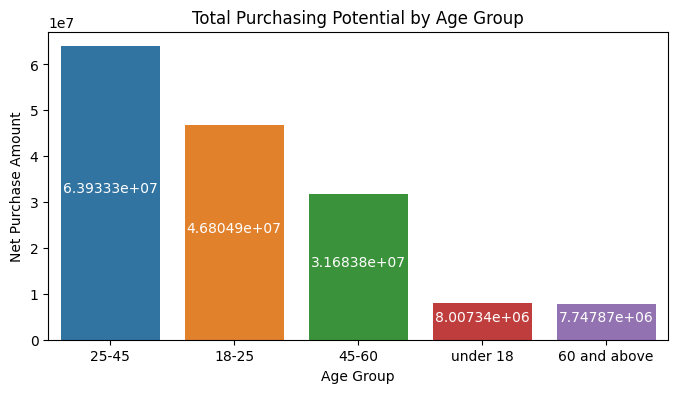

In [97]:
age_group_purchase_amount = df.groupby('age_group')['net_amount'].sum().reset_index()
age_group_purchase_amount = age_group_purchase_amount.sort_values(by = ['net_amount'], ascending = False)

plt.figure(figsize=(8,4))

a = sns.barplot(age_group_purchase_amount, x = 'age_group', y = 'net_amount')
plt.title('Total Purchasing Potential by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars, label_type = 'center', padding = 3, color = 'w')
    
plt.show()

#### Which gender shows higher purchasing activity?

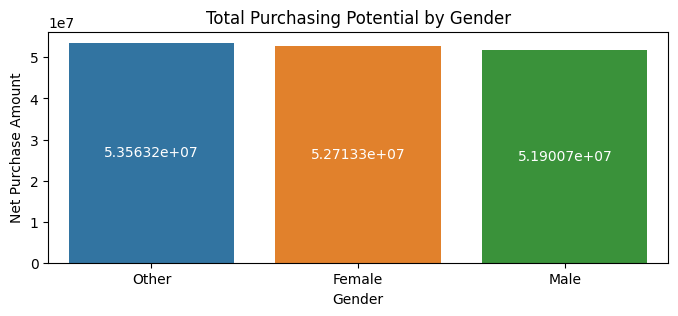

In [98]:
gender_purchasing_power = df.groupby('gender')['net_amount'].sum().reset_index()
gender_purchasing_power = gender_purchasing_power.sort_values(by = ['net_amount'], ascending = False)

plt.figure(figsize=(8,3))

a = sns.barplot(gender_purchasing_power, x='gender', y='net_amount', )
plt.title('Total Purchasing Potential by Gender')
plt.xlabel('Gender')
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars, label_type = 'center', color = 'w')
    
plt.show()

#### What are the top-selling product categories?

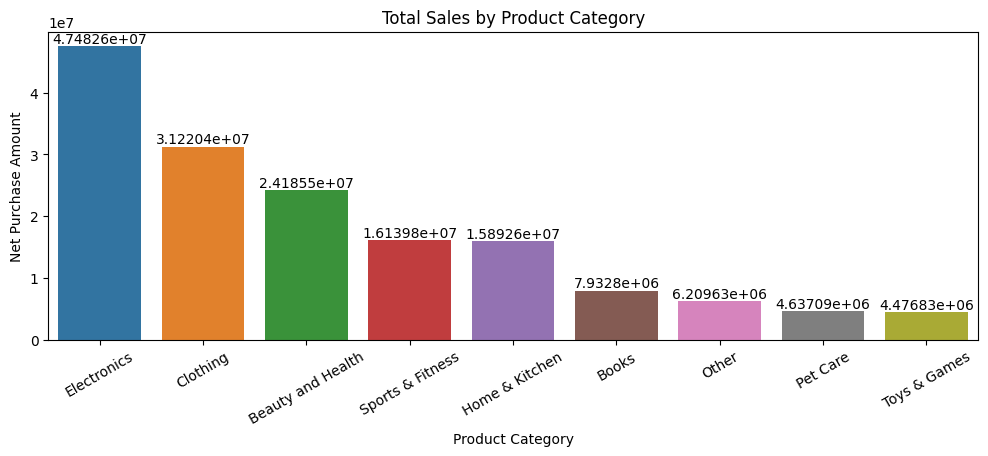

In [99]:
category_sales = df.groupby('product_category')['net_amount'].sum().reset_index()
category_sales = category_sales.sort_values(by = ['net_amount'], ascending = False)

plt.figure(figsize=(12,4))

a = sns.barplot(category_sales, x='product_category', y='net_amount', width = 0.8)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation =30)
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars)

plt.show()

#### Which location generates the most revenue?

In [100]:
location_sales = df.groupby('location')['net_amount'].sum().reset_index()
location_sales = location_sales.sort_values(by = ['net_amount'], ascending = False)
location_sales

,location,net_amount
9,Mumbai,3.208384e+07
4,Delhi,3.109897e+07
1,Bangalore,2.361955e+07
5,Hyderabad,1.581339e+07
2,Chennai,1.263518e+07
11,Pune,1.090214e+07
0,Ahmedabad,8.114984e+06
7,Kolkata,7.805355e+06
6,Jaipur,4.854492e+06
8,Lucknow,3.270708e+06


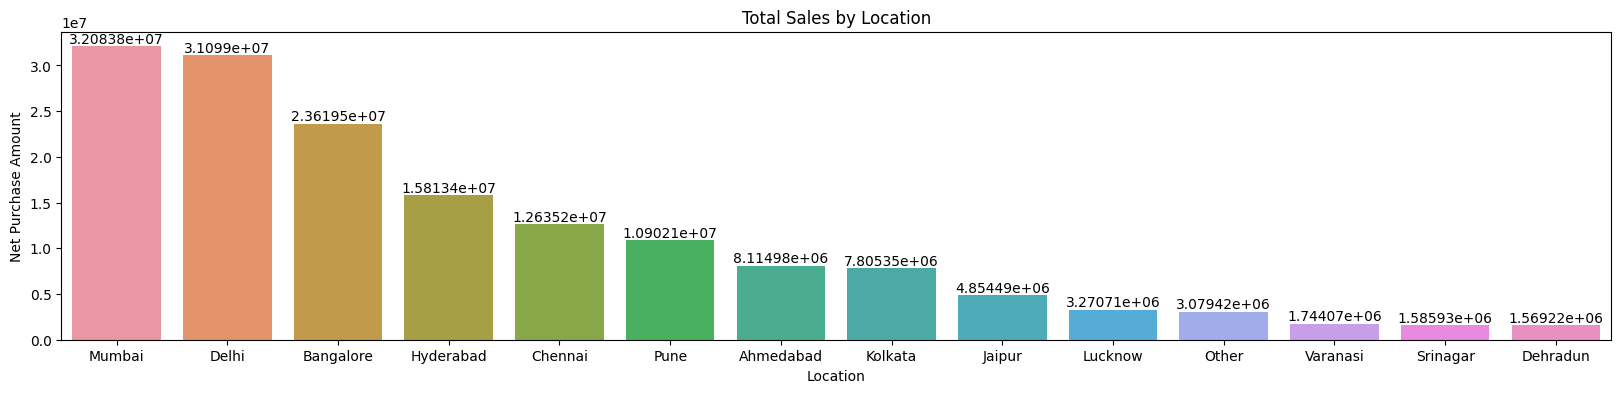

In [101]:
plt.figure(figsize=(20,4))

a = sns.barplot(location_sales, x='location', y='net_amount')
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars)

plt.show()

#### Do discounts impact the purchasing behavior significantly?

In [102]:
discounted_sales = df.groupby(df['discount_availed']=='Yes')['net_amount'].mean().reset_index()
discounted_sales = discounted_sales.sort_values(by = 'net_amount', ascending = False)
discounted_sales

,discount_availed,net_amount
0,False,3013.379444
1,True,2737.667978


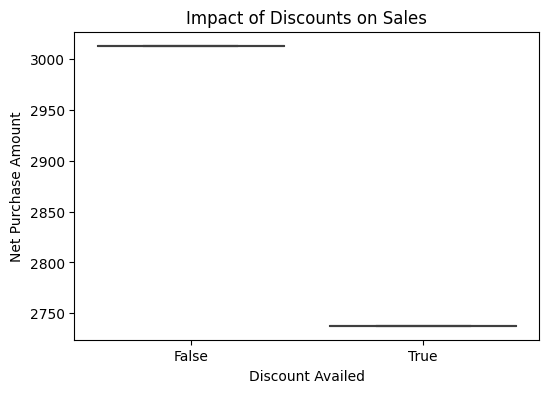

In [103]:
plt.figure(figsize=(6,4))

a = sns.boxplot(discounted_sales, x='discount_availed', y='net_amount')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount Availed')
plt.ylabel('Net Purchase Amount')

plt.show()

#### Which time of year shows peak sales activity?

In [104]:
monthly_sales = df.groupby(df['purchase_date'].dt.month)['net_amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by = ['purchase_date'], ascending = True)
monthly_sales

,purchase_date,net_amount
0,1,1.202647e+07
1,2,1.000025e+07
2,3,1.255316e+07
3,4,1.301843e+07
4,5,1.319709e+07
5,6,1.132360e+07
6,7,1.184880e+07
7,8,1.321897e+07
8,9,1.321861e+07
9,10,1.402244e+07


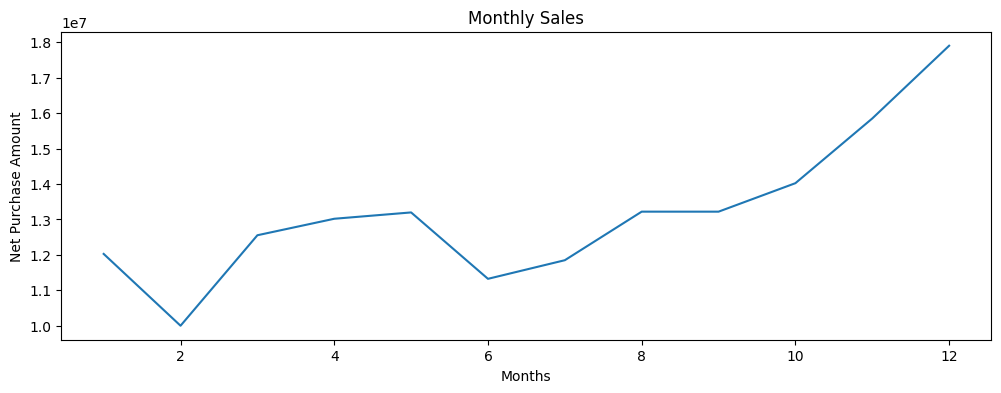

In [105]:
monthly_sales = df.groupby(df['purchase_date'].dt.month)['net_amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by = 'net_amount', ascending = True)

plt.figure(figsize=(12,4))

a = sns.lineplot(monthly_sales, x='purchase_date', y='net_amount', markers = 'o')
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Net Purchase Amount')

plt.show()


#### What is the most popular purchase method?

In [106]:
popular_purchase_method = df['purchase_method'].value_counts()
popular_purchase_method

purchase_method
Credit Card           22096
Debit Card            13809
Net Banking            5485
International Card     2815
Cash on Delivery       2768
PhonePe UPI            2683
Paytm UPI              2674
Google Pay UPI         2670
Name: count, dtype: int64

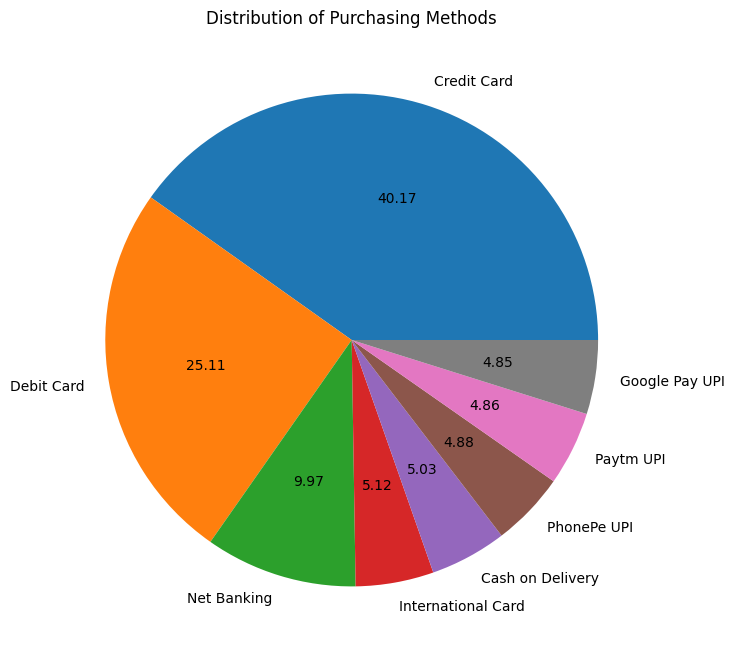

In [107]:
popular_purchase_method = df['purchase_method'].value_counts()

plt.figure(figsize = (8,8))
plt.pie(popular_purchase_method, labels= popular_purchase_method.index, autopct = '%.2f')
plt.title('Distribution of Purchasing Methods')
plt.show()

### Conclusion of E-Commerce Customer Purchase Analysis

#### 1. **Age Group with the Highest Purchasing Potential**
The analysis showed that certain age groups contribute more significantly to the total net purchase amount. By examining the total spending across different age groups, it was found that:
- The age group "25-45" has the highest purchasing potential, contributing the most to the overall sales.
- Younger age groups (under 18) and older age groups (60 and above) have comparatively lower purchasing potential.

#### 2. **Gender-wise Purchasing Behavior**
The comparison of purchasing behavior between different genders revealed that:
- The "Other" gender category leads in spending, showing the highest average purchase amount.
- Males and females have a comparatively equal contribution to the total sales, indicating balanced purchasing behavior between these genders.
- This suggests that marketing efforts should target all gender categories equally, as each gender significantly contributes to overall sales.

#### 3. **Top-Selling Product Categories**
The analysis of product categories highlighted that:
- Electronics and Clothing are the top-selling categories, generating the highest revenue.
- Categories like Beauty and Health and Sports & Fitness also showed significant sales, suggesting diversified interests among customers.

#### 4. **Location-based Revenue Generation**
The geographical analysis of sales indicated that:
- Major metropolitan areas such as Mumbai, Delhi, and Bangalore are the top revenue-generating locations.
- There is a considerable amount of sales from other cities as well, highlighting the widespread customer base.

#### 5. **Impact of Discounts on Purchasing Behavior**
The investigation into the impact of discounts on purchasing behavior showed that:
- Transactions without discounts ("NO discount_availed") generally have a higher total net purchase amount compared to those with discounts ("discount_availed").
- This suggests that while discounts attract customers and increase the number of transactions, they may also lead to lower spending per transaction. Therefore, it's important to balance discount offerings to ensure profitability.

#### 6. **Seasonal Sales Trends**
The examination of monthly sales trends revealed that:
- Certain months, particularly during festive seasons and major sales events, show a spike in sales.
- Months like November (coinciding with Diwali) and December (holiday season) have the highest sales, indicating the impact of seasonal shopping behavior.

#### 7. **Preferred Purchase Methods**
The analysis of purchase methods uncovered that:
- Credit Cards and Debit Cards are the most popular payment methods among customers.
- Digital wallets and cash on delivery also have a significant share, reflecting diverse payment preferences.

### Recommendations
- **Targeted Marketing**: Focus marketing efforts on the age group "25-45" and ensure inclusive marketing that targets all gender categories equally, as they all contribute significantly to sales.
- **Promotional Strategies**: Continue offering attractive discounts and promotional offers to boost sales, but monitor the impact on average transaction value to ensure profitability.
- **Product Focus**: Prioritize stocking and marketing electronics and clothing, as these are the top-selling categories.
- **Regional Strategies**: Optimize logistics and marketing campaigns in major metropolitan areas to capitalize on high revenue generation.
- **Payment Options**: Ensure a seamless payment experience across popular methods, including credit cards, debit cards, and digital wallets, to cater to diverse customer preferences.

By leveraging these insights, the e-commerce platform can enhance its sales strategies, improve customer satisfaction, and achieve better overall performance.